Let's check to make sure these libraries are installed and working.

In [ ]:
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Now let's import the dataset

In [ ]:

# Let's upload the dataset we want to use
dataset = '/content/Real_Property_Information.csv'
# Let's print and see the dataset
data = pandas.read_csv(dataset, low_memory=False)
# Let's look at the dimensions of the data
print('\n',data.shape, '\n')
# Let's look at the first few rows of the data
data.head()


Let's look at the data types of the data, and how it is distributed, maybe even some correlation

In [ ]:

# Let's look at how the data is distributed
data.describe()
#data.dtypes


Let's try to do some preprocessing on the code

Looks like the dataset is not perfect.



In [ ]:
# Let's create a subset of the original data with values we want to use
dataset = data.loc[:, ('ST_NAME','NEIGHBOR', 'ZIP_CODE', 'FULLCASH', 'ARTAXBAS', 'TAXBASE', 'BFCVLAND', 'BFCVIMPR', 'LANDEXMP', 'IMPREXMP', 'CITYCRED', 'STATCRED', 'SALEPRIC')]
# Let's look at these data types
print(dataset.dtypes)

In [ ]:
# Let's Find out if we Have Missing Values
print(dataset.isnull().sum())




In [ ]:

# ========== APPROACH 1 ===================

# If we do, let's just remove those entries from our dataset
dataset.dropna(inplace=True)
# Let's look at the new dimensions of the data
print('\n',dataset.shape, '\n')
# Now let's make our variables
#X = numpy.array(dataset.drop(columns=['SECTION']))
#Y = numpy.array(dataset['SECTION']) # WHAT WE WANT TO PREDICT

#  =============================================


In [ ]:
from sklearn import preprocessing
# =========== APPROACH 2 =======================
# Let's convert objs to numerical values
le = preprocessing.LabelEncoder()

strt_name = le.fit_transform(list(dataset['ST_NAME']))
neighbor = le.fit_transform(list(dataset['NEIGHBOR']))
zip_code = le.fit_transform(list(dataset['ZIP_CODE']))
full_cash = le.fit_transform(list(dataset['FULLCASH']))
ar_tax = le.fit_transform(list(dataset['ARTAXBAS']))
tax_base = le.fit_transform(list(dataset['TAXBASE']))
BFCVLAND = le.fit_transform(list(dataset['BFCVLAND']))
BFCVIMPR = le.fit_transform(list(dataset['BFCVIMPR']))
LANDEXMP = le.fit_transform(list(dataset['LANDEXMP']))
IMPREXMP = le.fit_transform(list(dataset['IMPREXMP']))
CITYCRED = le.fit_transform(list(dataset['CITYCRED']))
STATCRED = le.fit_transform(list(dataset['STATCRED']))
SALEPRIC = le.fit_transform(list(dataset['SALEPRIC']))

predict = 'NEIGHBOR'

X = list(zip(strt_name,zip_code,full_cash,ar_tax,tax_base,BFCVLAND, BFCVIMPR, LANDEXMP, IMPREXMP, CITYCRED, STATCRED, SALEPRIC))
Y = list(neighbor)


'''
from sklearn.impute import SimpleImputer as si
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder as ohe

# this finds any missings values and replaces with mean
imputer = si(missing_values=numpy.nan, strategy='mean')
#let's fit it to our independet vectors
imputer.fit(dataset)
# let's apply it to our independent vectors
dataset = imputer.transform(dataset)
c = ['SECTION', 'TAXBASE', 'BFCVLAND', 'BFCVIMPR', 'LANDEXMP', 'IMPREXMP', 'CITYCRED', 'STATCRED', 'SALEPRIC']
dataset = pandas.DataFrame(dataset, columns=c)
# let's see how it looks
print("\n HERE IS DATA WITH REPLACEMENTS \n")
print(dataset.isnull().sum())

# Now let's make our variables
X = numpy.array(dataset.drop(columns=['SECTION']))
Y = numpy.array(dataset['SECTION']) # WHAT WE WANT TO PREDICT

X.shape
'''


In [ ]:
# Let's try standardizing the data
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])
'''

Let's make some data visuals

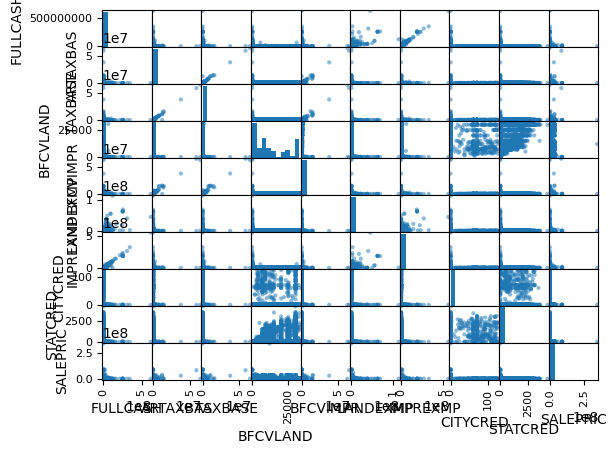

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(dataset)
plt.show()

Machine Learning Model

In [ ]:
from pandas.core.common import random_state
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pickle

# Let's split up data for training and testing
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y, test_size=0.3, random_state=265) 

#kfold = KFold(n_splits=100, random_state=265, shuffle=True)

'''
model = svm.SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)
'''

# ======== KN NEIGHBORS =============
#model = KNeighborsClassifier(n_neighbors=3)
#model.fit(x_train, y_train)

# ========= DECISION TREE ============
model = DecisionTreeClassifier(criterion="gini", max_depth=25)
model = model.fit(x_train,y_train)


# ========= Accuracy =========
#print(sklearn.metrics.get_scorer_names())
#scoring = 'accuracy'
#results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
#print('Logloss: \n', 'Accuracy: ', round(results.mean() * 100, 4), '%')
acc = model.score(x_test, y_test)
print('MODEL 1 Accuracy: ',round(acc*100,4),'%\n')

# ====================================



# uncomment when we want to train data model
# useful for saving data *below*
'''
best = 0
for _ in range(100): # How many generations we want to run this model and save and get best
  x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y, test_size=0.1) 

  # ====== LINEAR REGRESSION =========

  # Trying a linear regression model
  linear = linear_model.LinearRegression()
  linear.fit(x_train, y_train)
  acc = linear.score(x_test, y_test)
  print(acc)

  # Let's save the best model and work up
  if acc > best:
    best = acc
    with open('sectionModel.pickle', 'wb') as f:
      pickle.dump(linear, f)

pickle_in = open('sectionModel.pickle', 'rb')
linear = pickle.load(pickle_in)

acc = linear.score(x_test, y_test)
print('Accuracy: ',round(acc*100,4),'%')
# =====================================
'''

MODEL 1 Accuracy:  82.3 %



"\nbest = 0\nfor _ in range(100): # How many generations we want to run this model and save and get best\n  x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y, test_size=0.1) \n\n  # ====== LINEAR REGRESSION =========\n\n  # Trying a linear regression model\n  linear = linear_model.LinearRegression()\n  linear.fit(x_train, y_train)\n  acc = linear.score(x_test, y_test)\n  print(acc)\n\n  # Let's save the best model and work up\n  if acc > best:\n    best = acc\n    with open('sectionModel.pickle', 'wb') as f:\n      pickle.dump(linear, f)\n\npickle_in = open('sectionModel.pickle', 'rb')\nlinear = pickle.load(pickle_in)\n\nacc = linear.score(x_test, y_test)\nprint('Accuracy: ',round(acc*100,4),'%')\n# =====================================\n"

In [ ]:
# Let's test it with some predictions
predictions = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

for x in range(len(predictions)):
  print("\nPrediction: ",predictions[x], "\nInput Data: ",x_test[x], "\nActual Data: ", y_test[x])
# ==================================


Streaming output truncated to the last 5000 lines.

Prediction:  72 
Input Data:  (129, 25, 0, 2317, 2425, 270, 596, 0, 0, 0, 0, 5909) 
Actual Data:  72

Prediction:  10 
Input Data:  (455, 25, 0, 2493, 2642, 270, 654, 0, 0, 0, 0, 5381) 
Actual Data:  10

Prediction:  272 
Input Data:  (1982, 17, 0, 3286, 3419, 323, 857, 0, 0, 0, 0, 4008) 
Actual Data:  272

Prediction:  53 
Input Data:  (1917, 17, 0, 1055, 1102, 100, 344, 0, 0, 0, 0, 0) 
Actual Data:  53

Prediction:  33 
Input Data:  (0, 0, 6, 0, 0, 0, 0, 6, 0, 0, 0, 0) 
Actual Data:  273

Prediction:  58 
Input Data:  (747, 16, 0, 2500, 2510, 216, 659, 0, 0, 0, 0, 9395) 
Actual Data:  58

Prediction:  262 
Input Data:  (1213, 19, 0, 3132, 3196, 323, 806, 0, 0, 0, 0, 0) 
Actual Data:  262

Prediction:  55 
Input Data:  (480, 11, 0, 2818, 2664, 266, 760, 0, 0, 0, 0, 7461) 
Actual Data:  55

Prediction:  110 
Input Data:  (1743, 24, 0, 302, 290, 42, 175, 0, 0, 0, 0, 1186) 
Actual Data:  110

Prediction:  177 
Input Data:  (908, 33, 0, 

FINAL DATA VISUALS

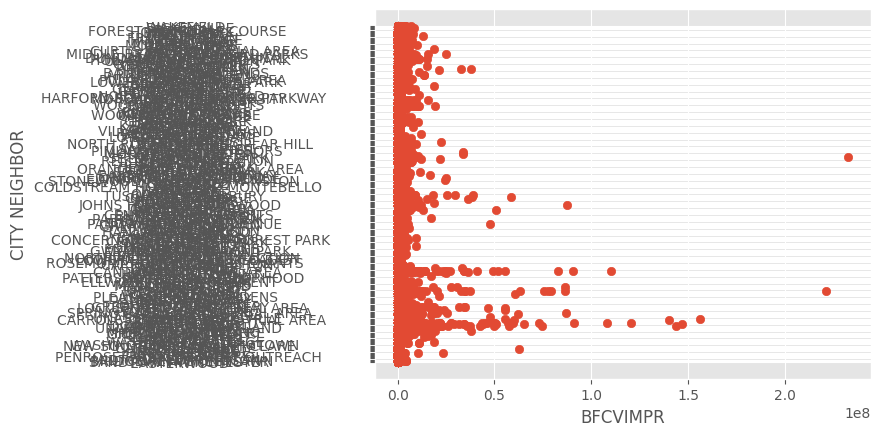

In [ ]:
from matplotlib import style

style.use('ggplot')
c = ['ST_NAME','NEIGHBOR', 'ZIP_CODE', 'FULLCASH', 'ARTAXBAS', 'TAXBASE', 'BFCVLAND', 'BFCVIMPR', 'LANDEXMP', 'IMPREXMP', 'CITYCRED', 'STATCRED', 'SALEPRIC']
p = 'BFCVIMPR'
plt.scatter(data[p], data['NEIGHBOR'])
plt.xlabel(p)
plt.ylabel('CITY NEIGHBOR')
plt.show()